# Clustering
The aim of this exercise is to familiarise yourself with the analysis of clustering hyperparameters. For this purpose, let us consider the AgglomerativeClustering algorithm in sklearn. Using `make_circles`, `make_moons`, `make_blobs` visualise the different performance of different linkages (ward, complete, average, single). Perform a little bit of hyperparameter tuning and show for the different linkage models the best model you have found. 

In the second part of this exercise, compare these results with the performance of Kmeans and Kmeans with t-SNE as preprocessing. You are not required to perform extensive parameter scanning but do not just use default parameters.

In [31]:
from itertools import chain
import tensorflow as tf
from sklearn.manifold import TSNE
import numpy as np
from itertools import cycle, islice
import itertools
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.datasets import make_circles, make_moons, make_blobs

import matplotlib.pyplot as plt


In [74]:
class Data:
    """Class to generate the datasets. 
    The number of clusters and the name of the dataset is also saved in the class variable."""
    def __init__(self, n_samples=1000):
        self.n_samples = n_samples
        self.circles = (make_circles(n_samples=n_samples), 2, 'circles')
        self.moons = (make_moons(n_samples=n_samples), 2, 'moons')      
        self.blobs = (make_blobs(n_samples=n_samples), 3, 'blobs')
    def datasets(self):
        return self.circles, self.moons, self.blobs
        

    

class AggloClustering:
    """Class for Agglomerative Clustering with the four different linakges."""
    
    def __init__(self, data):
        self.data = data[0]
        self.n_cluster = data[1]
        self.ward = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=self.n_cluster)
        self.average = AgglomerativeClustering(linkage="average", affinity="cityblock", n_clusters=self.n_cluster)
        self.complete = AgglomerativeClustering(linkage="complete", affinity="cityblock", n_clusters=self.n_cluster)
        self.single = AgglomerativeClustering(linkage="single", affinity="cityblock", n_clusters=self.n_cluster)
        
        
        self.clustering_algorithms = (('Ward', self.ward),
                             ('average', self.average),
                             ('complete', self.complete),
                             ('single', self.single))
    
        
        
        
        
    def plot(self):
        """The plotting function fits and predicts the classes for the dataset and then plots accordingly."""
        plot_num=1
        
        for name, algorithm in self.clustering_algorithms:
            #predicting the clustering
            y_pred = algorithm.fit_predict(self.data[0])
            
            #setting different colors to choose from when plotting the clustering
            colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                 '#f781bf', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(y_pred) + 1))))
            # add black color for outliers (if any)
            colors = np.append(colors, ["#000000"])
            l2_plot = plt.subplot(3, 4, plot_num)
            plt.scatter(self.data[0][:, 0], self.data[0][:, 1], s=10, color=colors[y_pred])
            
            
            plt.title(name)
            
            # calculating the accuracy with permutations of the labels, 
            # since the algorithm can't know which label belongs to a cluster
            perm = np.array(list((itertools.permutations([0, 1, 2]))))
            acc = [self.data[0][np.array([perm[i,x] for x in self.data[1]])==y_pred].shape[0]/self.data[0].shape[0] for i in range(6)]
            accuracy = max(acc)
            print(name +': Accuracy of '+str(accuracy))
            

            plt.xticks(())
            plt.yticks(())

            plot_num +=1
            
        plt.show()
    



        
class ComparisonClustering:
    """Class to compare the Agglomerative Clustering algorithm with. Depending on wether you 
    choose apply_tsne to be True or False, the data is transformed by t-SNE before applying KMeans or not."""
    
    def __init__(self, data, apply_tsne=False):
        self.data = data[0]
        self.n_clusters = data[1]
        self.kmeans = KMeans(n_clusters=self.n_clusters)
        self.transformed = None
        self.tsne = TSNE(n_components=self.n_clusters, perplexity=30, early_exaggeration=20)
        
        if apply_tsne:          
            self.transformed = self.tsne.fit_transform(self.data[0])
                    
        
    def plot(self):
            #predicting the clustering
            if self.transformed is None:
                y_pred = self.kmeans.fit_predict(self.data[0])
            else:
                y_pred = self.kmeans.fit_predict(self.transformed)
            #setting different colors to choose from when plotting the clustering
            colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                 '#f781bf', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(y_pred) + 1))))
            # add black color for outliers (if any)
            colors = np.append(colors, ["#000000"])
            
            plt.scatter(self.data[0][:, 0], self.data[0][:, 1], s=10, color=colors[y_pred])
            # calculating the accuracy with permutations of the labels, 
            # since the algorithm can't know which label belongs to a cluster
            perm = np.array(list((itertools.permutations([0, 1, 2]))))
            acc = [self.data[0][np.array([perm[i,x] for x in self.data[1]])==y_pred].shape[0]/self.data[0].shape[0] for i in range(6)]
            accuracy = max(acc)
            
            plt.title('Accuracy of '+str(accuracy))
            
            plt.xticks(())
            plt.yticks(())   
            plt.show()
        
        




circles AggloClustering
Ward: Accuracy of 0.51
average: Accuracy of 0.5
complete: Accuracy of 0.5
single: Accuracy of 1.0


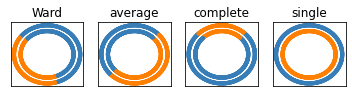

circles Kmeans


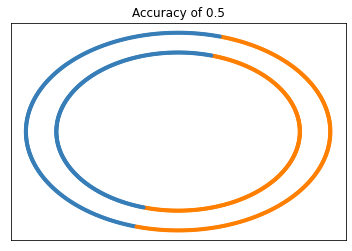

circles Kmeans with TSNE


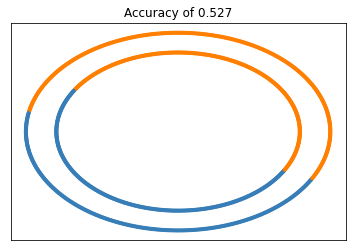

moons AggloClustering
Ward: Accuracy of 0.839
average: Accuracy of 0.857
complete: Accuracy of 0.857
single: Accuracy of 1.0


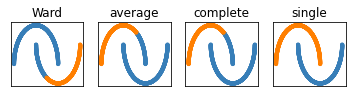

moons Kmeans


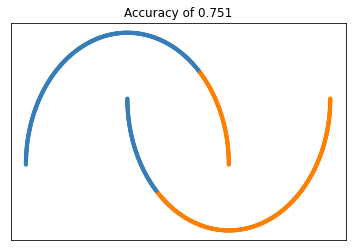

moons Kmeans with TSNE


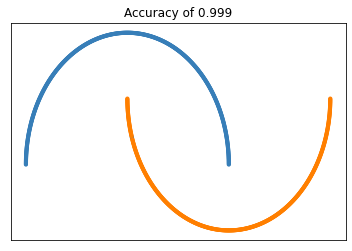

blobs AggloClustering
Ward: Accuracy of 1.0
average: Accuracy of 1.0
complete: Accuracy of 1.0
single: Accuracy of 1.0


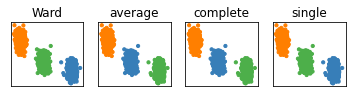

blobs Kmeans


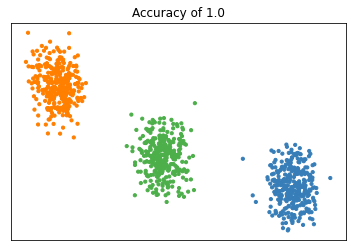

blobs Kmeans with TSNE


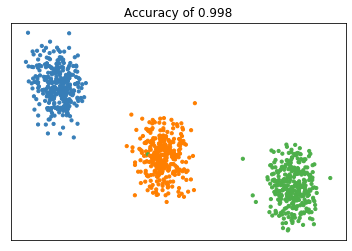

In [75]:
data = Data()
datasets = data.datasets()
for s in datasets:
    print(s[2], 'AggloClustering')
    model = AggloClustering(s)
    model.plot()
    #model.print_scores()
    print(s[2], 'Kmeans')
    comp = ComparisonClustering(s)
    comp.plot()
    
    print(s[2], 'Kmeans with TSNE')
    comp = ComparisonClustering(s, apply_tsne=True)
    comp.plot()